# Introduction to Matplotlib

1. Concepts in Matplotlib
2. 2 ways of creating plots (pyplot & OO) - use the OO method
3. Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
4. Plotting data directly with Pandas (using the pandas matplotlib wrapper)
5. Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
6. Cutomizing our plots, limits, colors, styles, legends
7. Saving plots

## 1. Concepts in Matplotlib
- What is Matplotlib?

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

## 2. 2 ways of creating plots
- `pyplot()`
- `Object oriented` (recommended)

In [1]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

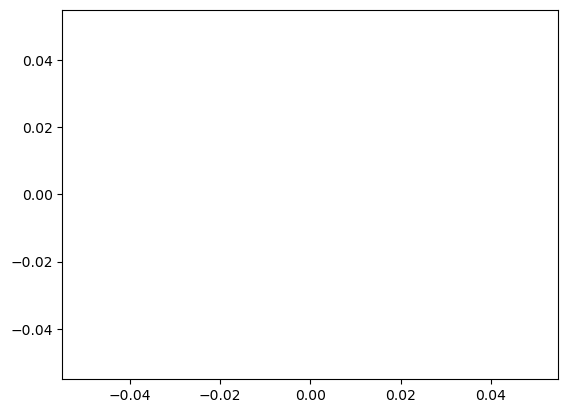

In [2]:
plt.plot()

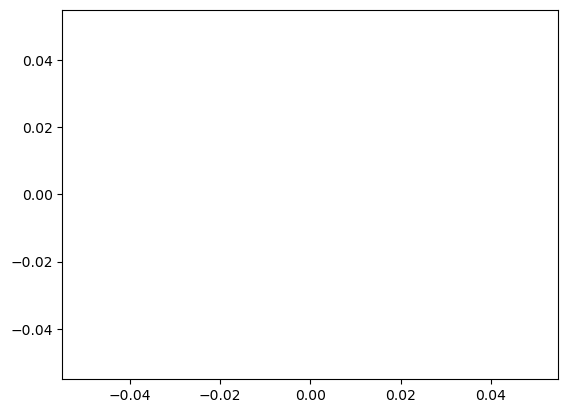

In [3]:
# With the semi-colon
plt.plot();

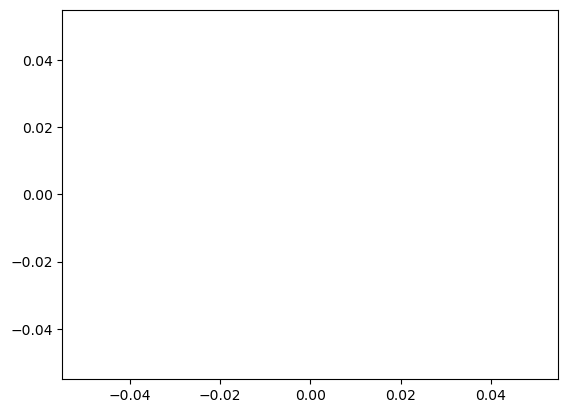

In [4]:
plt.plot()
plt.show();

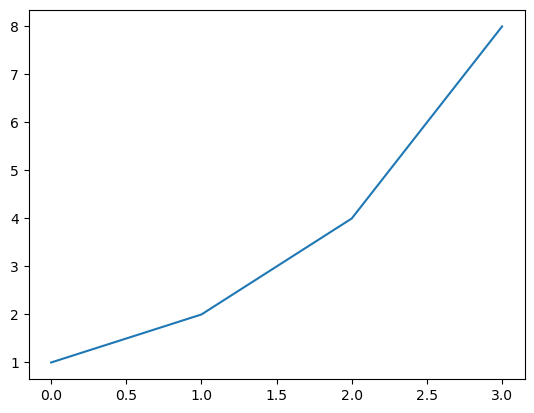

In [5]:
plt.plot([1, 2, 4, 8])

In [6]:
# Create some data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

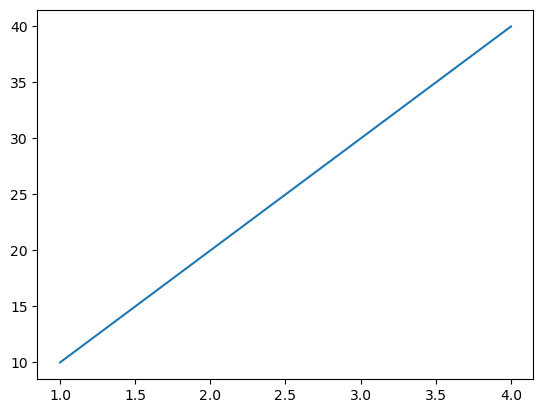

In [7]:
plt.plot(x,y);

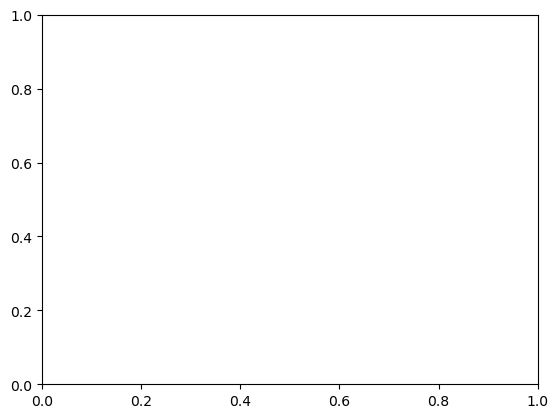

In [8]:
# Creating a plot with OO version
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

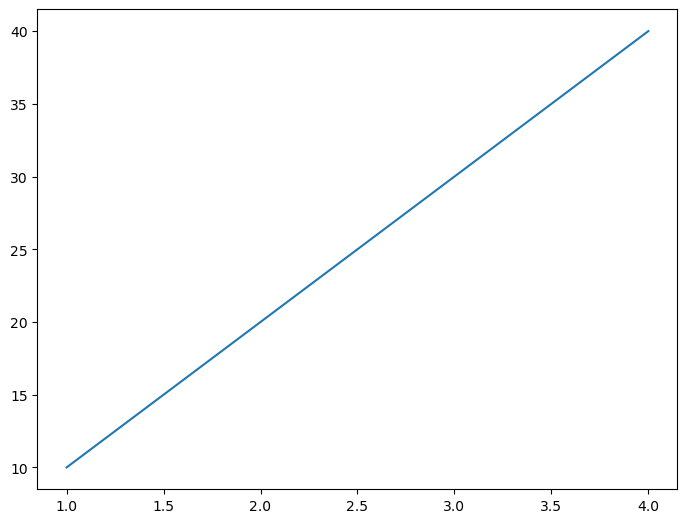

In [9]:
# one more way of OO
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show();

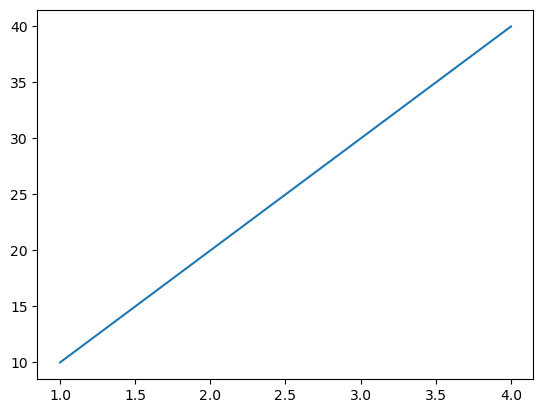

In [10]:
# Easier and more robust going forward
fig, ax = plt.subplots()
ax.plot(x,y);

In [11]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

### A matplotlib workflow

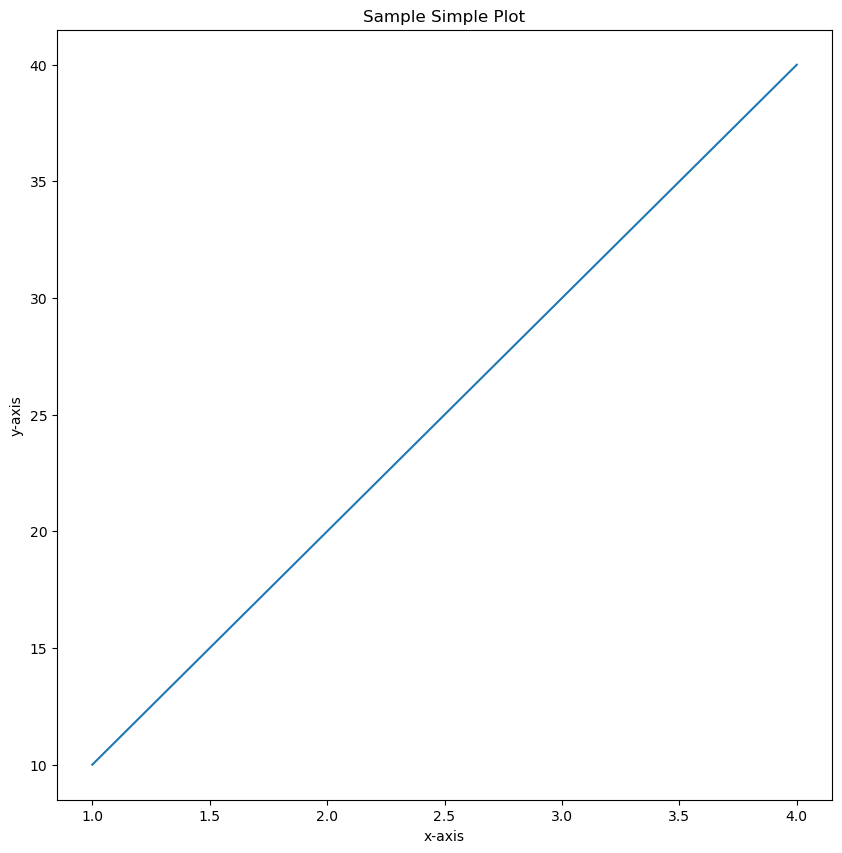

In [12]:
# 1. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Prepare data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

# 3. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 4. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. save & show
fig.savefig("../images/simple-plot.png")

## 3. Making the most common type of plots using NumPy arrays

Matplotlib visualizations are built off NumPy arrays. So we will try some of the most common types of plots using NumPy arrays

- `line`
- `scatter`
- `bar`
- `hist`
- `subplots()`

In [13]:
import numpy as np

### Line
Line is a default type of visualization in Matplotlib.

In [14]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

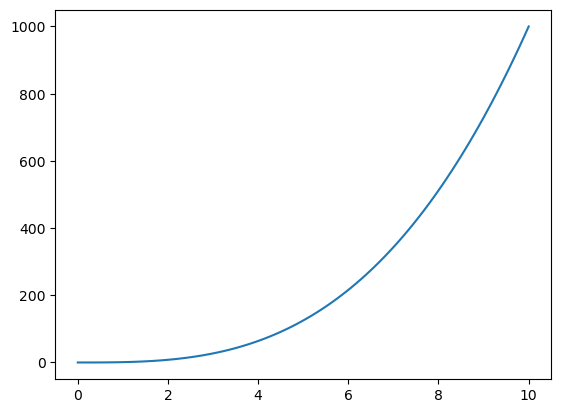

In [15]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**3);

### Scatter


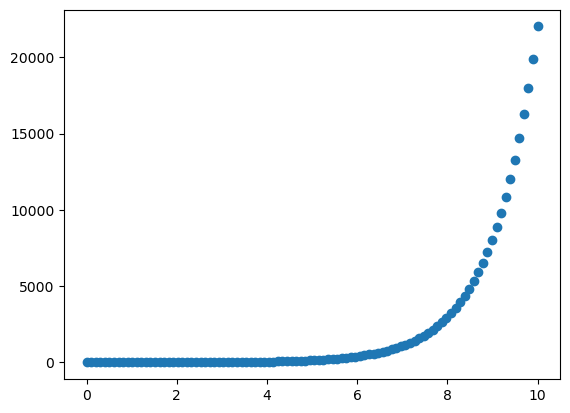

In [16]:
# Need to rereate out figure and axis instance when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

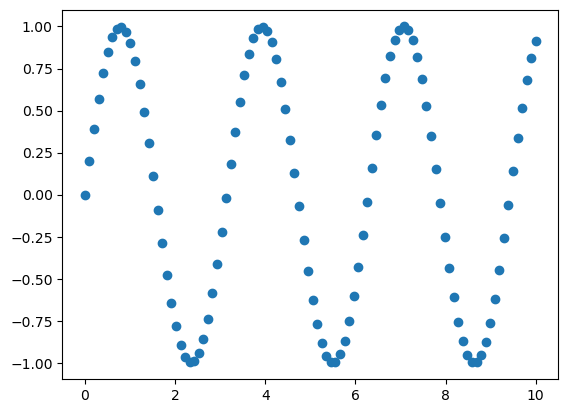

In [17]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x*2));

### Bar
- `Vertical`
- `Horizontal`

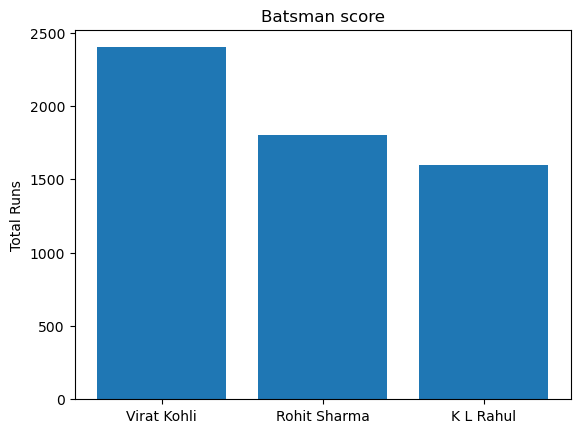

In [18]:
# we can also produce plots from a dictionary
batsman_score = {
    "Virat Kohli": 2400,
    "Rohit Sharma": 1800,
    "K L Rahul": 1600
}
fig, ax = plt.subplots()
ax.bar(batsman_score.keys(), batsman_score.values())
ax.set(title="Batsman score", ylabel="Total Runs");

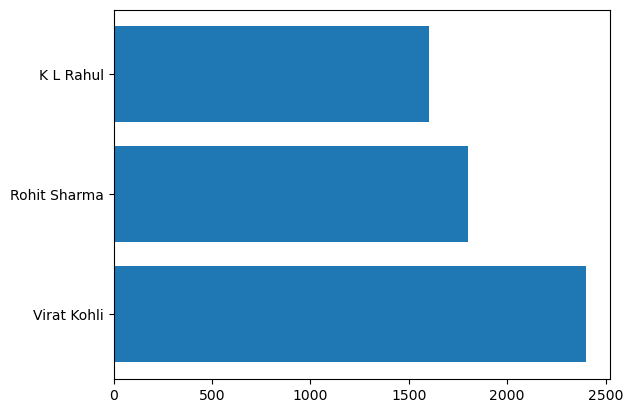

In [19]:
fig, ax = plt.subplots()
ax.barh(list(batsman_score.keys()), list(batsman_score.values()));

### Histogram (hist)
could show image of normal distribution here

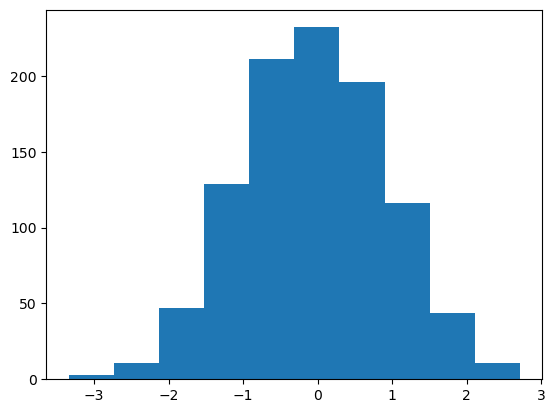

In [20]:
# Pull data from a normal distribution
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x);

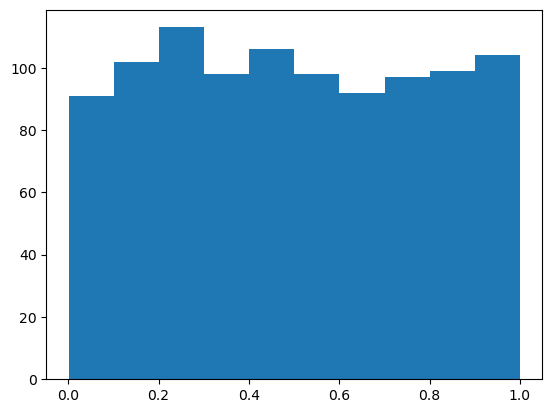

In [21]:
# random data from random distribution
x = np.random.random(1000)

fig, ax = plt.subplots()
ax.hist(x);

### Subplots
- Multiple plots on one figure

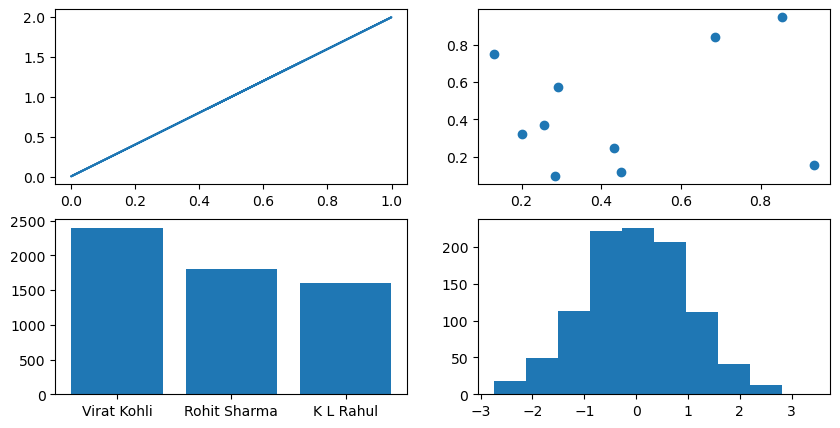

In [22]:
# Option 1 : Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot data to each axes
ax1.plot(x, x*2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(batsman_score.keys(), batsman_score.values());
ax4.hist(np.random.randn(1000));

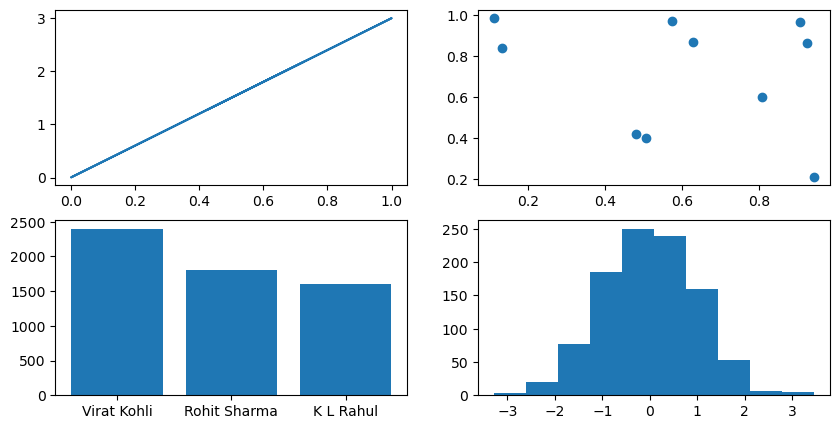

In [23]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x*3);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(batsman_score.keys(), batsman_score.values());
ax[1, 1].hist(np.random.randn(1000));

## 4. Plotting data directly with pandas

Here we will use `pd.plot()` method on DataFrame to plot.

In [24]:
import pandas as pd

In [38]:
# Import the car_sales dataset
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line

In [29]:
# Some dummy data
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2022', periods=1000))
ts

(2022-01-01    2.403079
 2022-01-02    0.412434
 2022-01-03    0.184972
 2022-01-04   -0.263140
 2022-01-05   -0.893286
                 ...   
 2024-09-22   -2.122863
 2024-09-23    1.246588
 2024-09-24   -0.327558
 2024-09-25    1.303934
 2024-09-26    0.820023
 Freq: D, Length: 1000, dtype: float64,
 pandas.core.series.Series)

In [30]:
ts.cumsum()

2022-01-01     2.403079
2022-01-02     2.815513
2022-01-03     3.000485
2022-01-04     2.737344
2022-01-05     1.844058
                ...    
2024-09-22   -35.590059
2024-09-23   -34.343471
2024-09-24   -34.671029
2024-09-25   -33.367095
2024-09-26   -32.547072
Freq: D, Length: 1000, dtype: float64

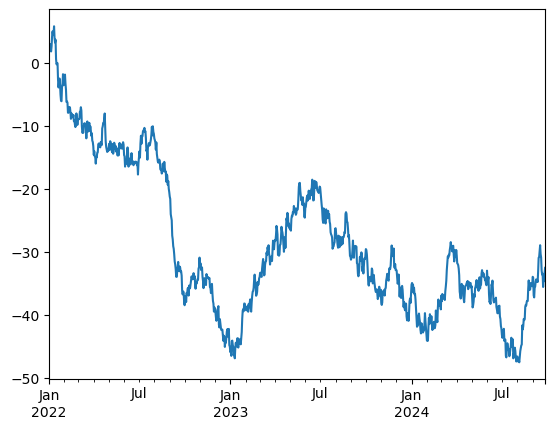

In [32]:
ts.cumsum().plot();

<Axes: >

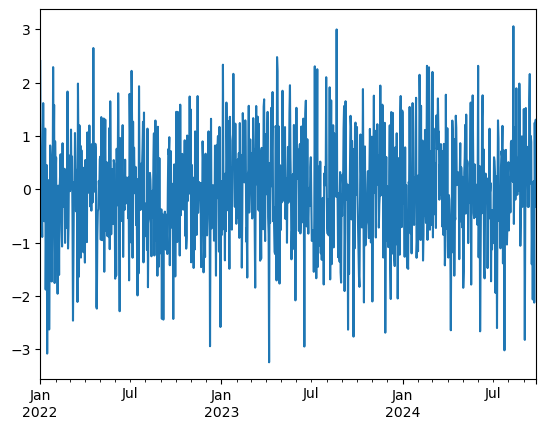

In [33]:
ts.plot()

### Working with actual data

In [39]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\kunal\AppData\Local\Temp\ipykernel_20636\54845402.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [40]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [41]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2022-01-01
1,Honda,Red,87899,4,5000,2022-01-02
2,Toyota,Blue,32549,3,7000,2022-01-03
3,BMW,Black,11179,5,22000,2022-01-04
4,Nissan,White,213095,4,3500,2022-01-05
5,Toyota,Green,99213,4,4500,2022-01-06
6,Honda,Blue,45698,4,7500,2022-01-07
7,Honda,Blue,54738,4,7000,2022-01-08
8,Toyota,White,60000,4,6250,2022-01-09
9,Nissan,White,31600,4,9700,2022-01-10


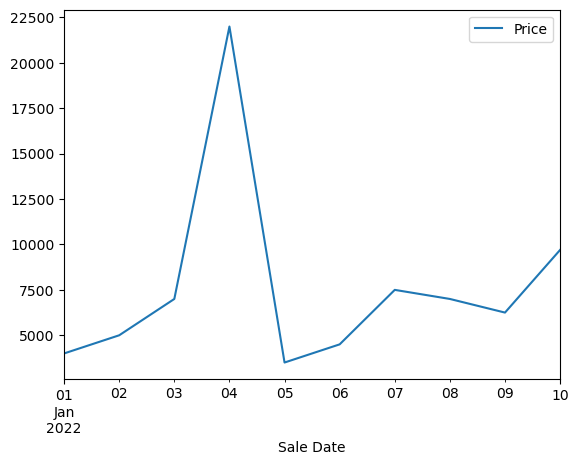

In [43]:
car_sales.plot(x='Sale Date', y='Price');

In [44]:
# Make total sales column
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


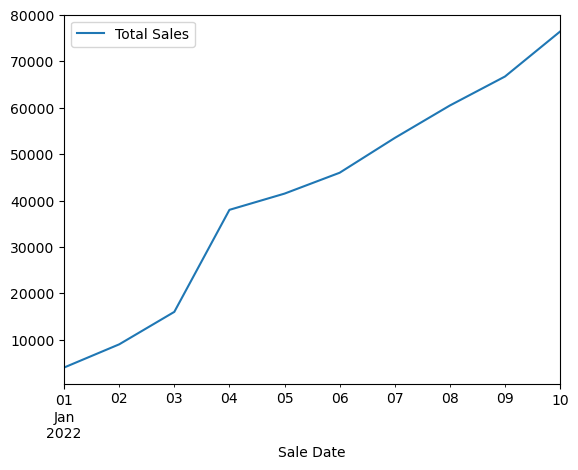

In [45]:
car_sales.plot(x='Sale Date', y='Total Sales');

### Scatter

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

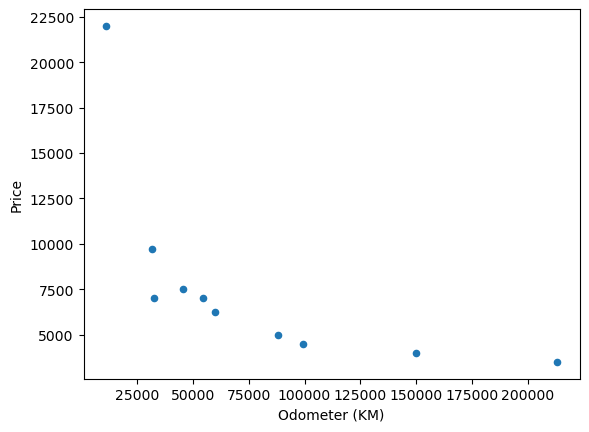

In [46]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

### Bar

In [47]:
x = np.random.rand(10,4)
x

array([[0.20126287, 0.58500612, 0.14672363, 0.09720247],
       [0.36784264, 0.55513424, 0.2248405 , 0.49447886],
       [0.69333708, 0.83464748, 0.14594266, 0.06866106],
       [0.69191393, 0.02425646, 0.40186282, 0.82643556],
       [0.48540134, 0.25589184, 0.61163937, 0.41076758],
       [0.73078546, 0.31346738, 0.69507447, 0.70909427],
       [0.94344553, 0.35050507, 0.00318041, 0.15699019],
       [0.94119642, 0.71498829, 0.93590777, 0.40842405],
       [0.39861208, 0.13484885, 0.26878472, 0.87262895],
       [0.97056824, 0.58099415, 0.3370082 , 0.07263139]])

In [48]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.201263,0.585006,0.146724,0.097202
1,0.367843,0.555134,0.224841,0.494479
2,0.693337,0.834647,0.145943,0.068661
3,0.691914,0.024256,0.401863,0.826436
4,0.485401,0.255892,0.611639,0.410768
5,0.730785,0.313467,0.695074,0.709094
6,0.943446,0.350505,0.003180,0.156990
7,0.941196,0.714988,0.935908,0.408424
8,0.398612,0.134849,0.268785,0.872629
9,0.970568,0.580994,0.337008,0.072631


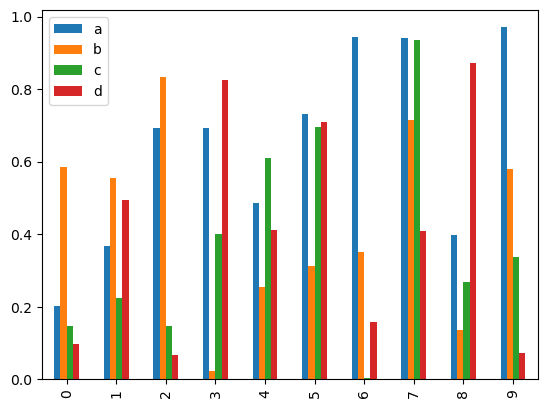

In [50]:
df.plot.bar();

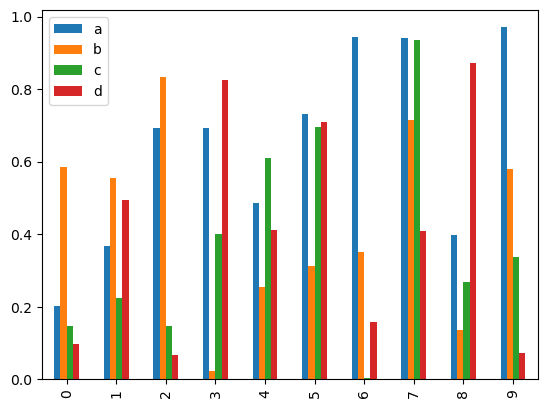

In [51]:
# another way of doing
df.plot(kind='bar');

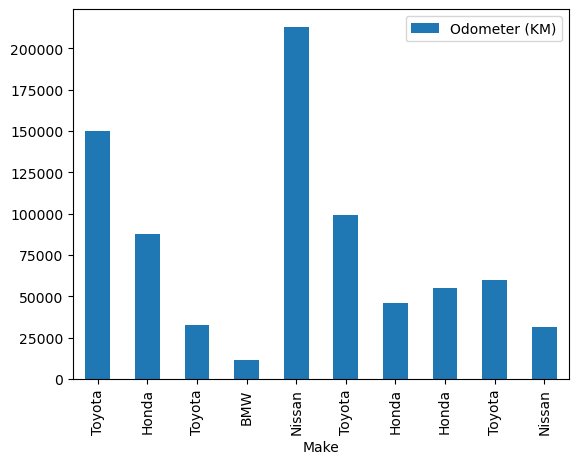

In [60]:
# car_sales.plot(x="Make", y="Odometer (KM)", kind='bar')

car_sales.plot.bar(x="Make", y="Odometer (KM)");

### Histograms

In [65]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


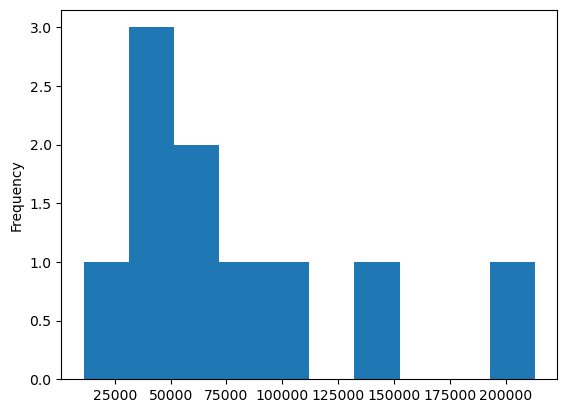

In [61]:
car_sales["Odometer (KM)"].plot.hist();

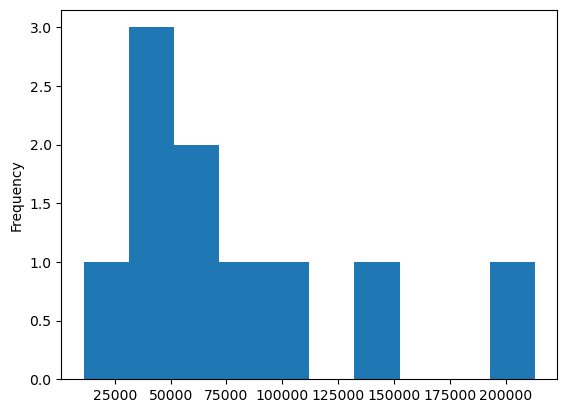

In [67]:
car_sales["Odometer (KM)"].plot(kind="hist");

<Axes: ylabel='Frequency'>

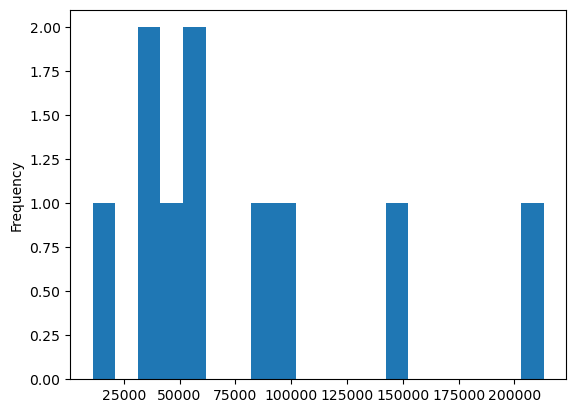

In [68]:
# Default number of bins is 10
car_sales["Odometer (KM)"].plot.hist(bins=20)

In [69]:
# Try on another dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


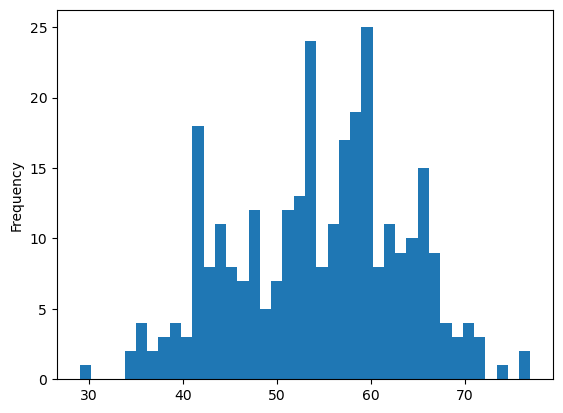

In [72]:
heart_disease["age"].plot.hist(bins=40);

### Subplots

In [73]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


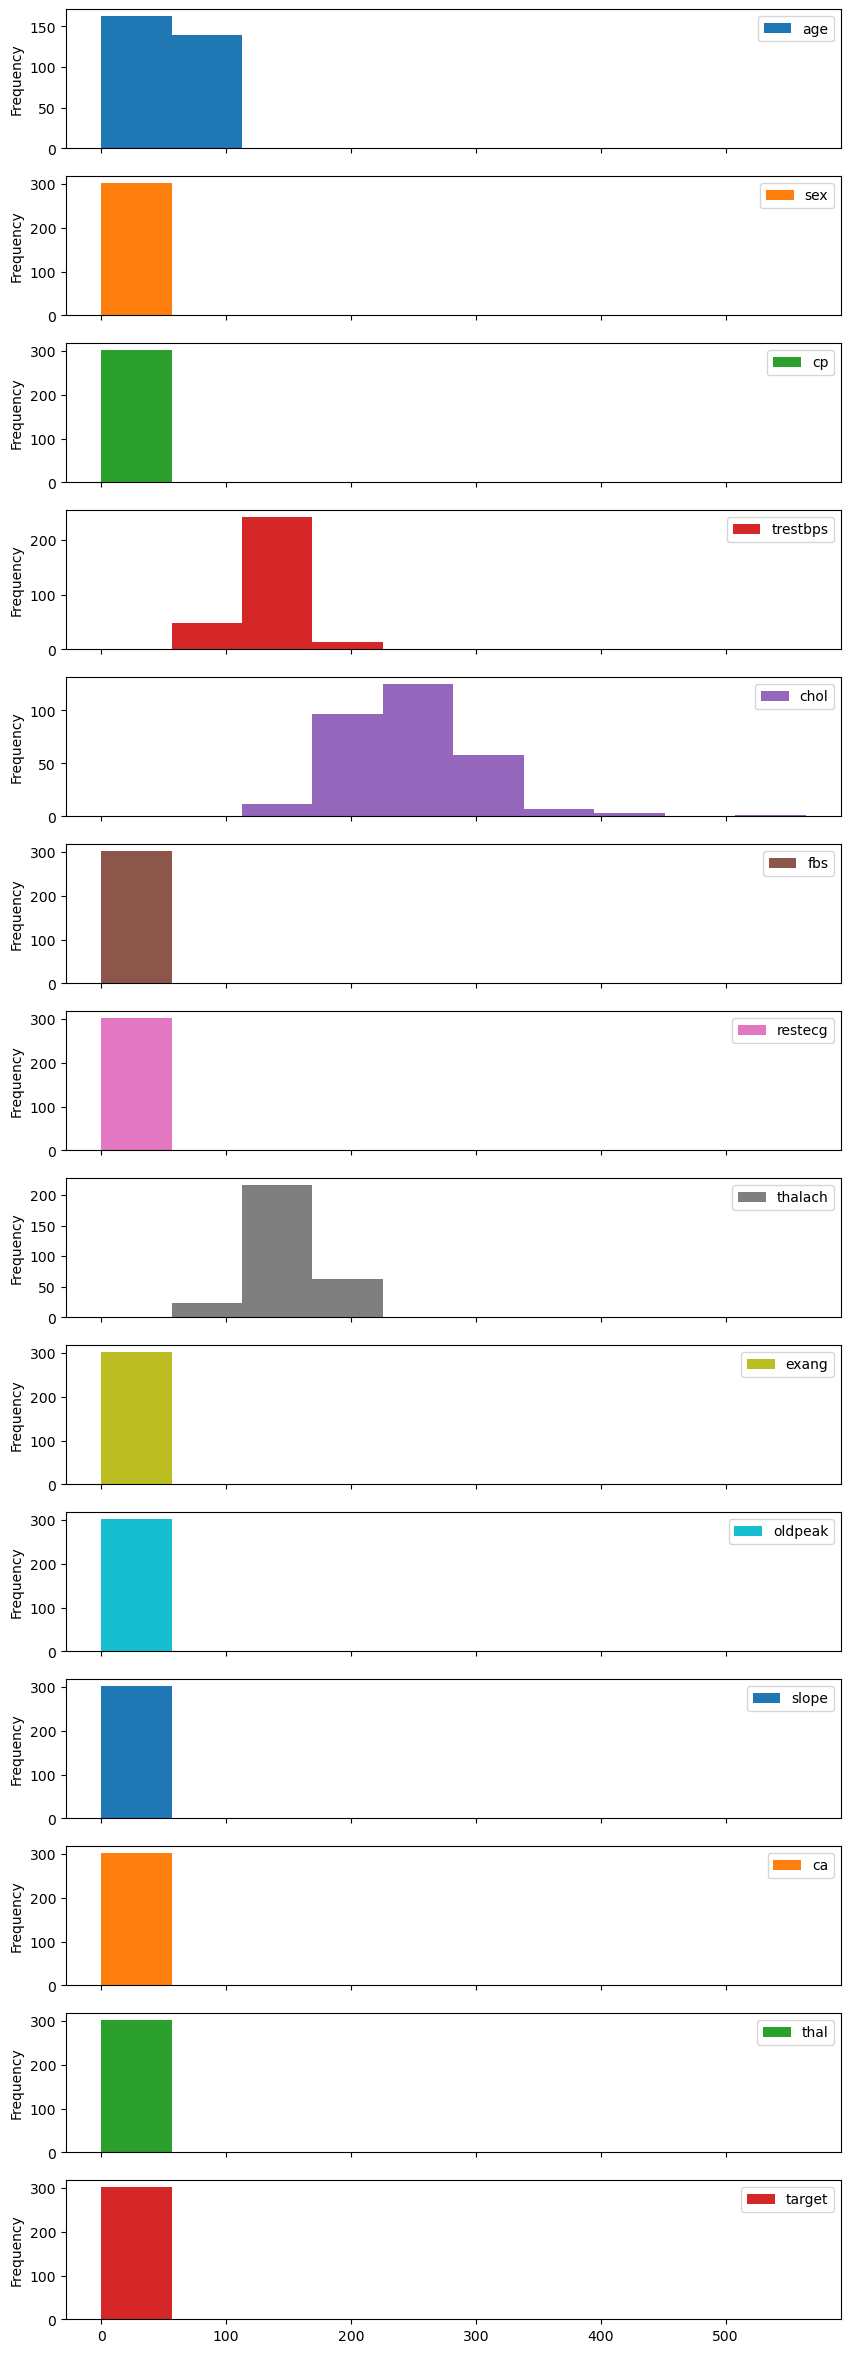

In [74]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);